# Vergleichmethode RandomForest

## für BERT Encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
Bert_title_train = pd.read_hdf("../data/BERT/Bert_title_NN.h5", key="train")
Bert_title_test = pd.read_hdf("../data/BERT/Bert_title_NN.h5", key="test")

y_train_b = Bert_title_train['label']
X_train_b = Bert_title_train.drop('label',axis=1)
y_test_b = Bert_title_test['label']
X_test_b = Bert_title_test.drop('label',axis=1)

In [3]:
RF_Bert = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0,criterion='entropy')
RF_Bert.fit(X_train_b,y_train_b)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [4]:
y_pred_b = RF_Bert.predict(X_test_b)
y_train_pred_b = RF_Bert.predict(X_train_b)
y_pred_prob_b = RF_Bert.predict_proba(X_test_b)
y_pred_prob_b = y_pred_prob_b[:,1]

In [5]:
X_train_b.head()


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
7623,-0.192002,-0.548974,0.071171,-0.269275,-0.200849,-0.291623,-0.216774,0.512812,-0.317526,0.134379,...,0.077660,-0.296686,-0.229277,-0.119112,1.002616,-0.208316,0.360505,-0.405213,0.443470,-0.456641
2795,-0.244090,-0.086528,0.515345,-0.070774,0.288625,-0.820126,0.484506,0.982290,-0.518791,-0.168500,...,-0.128146,0.028308,-0.002988,-0.220616,0.033655,0.342653,0.049871,-1.200187,-0.735403,-0.055025
21564,-0.209473,-0.153699,-0.201120,-0.318984,0.073975,-0.692211,-0.112993,0.118926,-0.188034,0.547603,...,0.060003,-0.303000,0.124234,-0.469229,0.616687,0.368737,-0.138074,-0.612309,0.289624,0.048681
25173,0.035834,-0.178724,0.201731,-0.172691,-0.110031,-0.579049,-0.047478,0.601645,-0.128653,0.084381,...,-0.096983,0.259828,0.476668,0.277661,0.541585,-0.312760,0.151271,-0.349666,-0.334987,0.248505
20511,0.072781,-0.297915,-0.052722,0.128803,-0.113884,0.048446,-0.007747,0.502236,0.013310,-0.116486,...,-0.183534,0.128730,-0.247939,-0.185485,0.299713,0.000346,0.352757,-0.548325,0.291049,0.204105


Trainings prediction: 
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8151
           1       0.88      0.99      0.93     10527

   micro avg       0.92      0.92      0.92     18678
   macro avg       0.93      0.91      0.92     18678
weighted avg       0.93      0.92      0.92     18678

Test prediction: 
              precision    recall  f1-score   support

           0       0.83      0.50      0.63      4016
           1       0.71      0.92      0.80      5185

   micro avg       0.74      0.74      0.74      9201
   macro avg       0.77      0.71      0.71      9201
weighted avg       0.76      0.74      0.72      9201

[[2028 1988]
 [ 429 4756]]


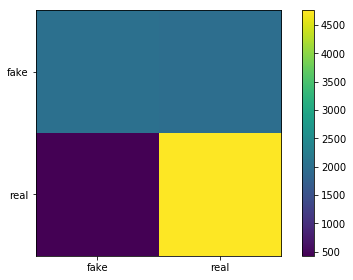

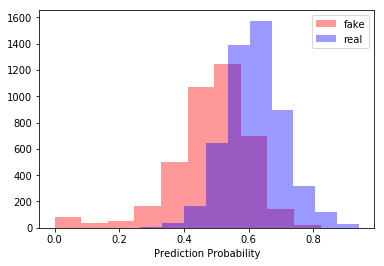

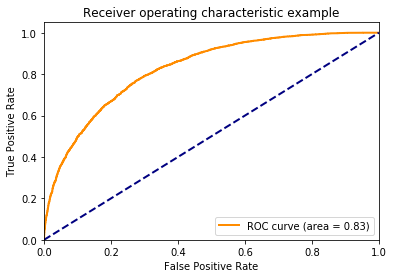

In [13]:
print("Trainings prediction: ")
print(classification_report(y_train_b,y_train_pred_b))
print("Test prediction: ")
print(classification_report(y_test_b, y_pred_b))
print(confusion_matrix(y_test_b, y_pred_b,
                       labels=[0,1]))
plt.imshow(confusion_matrix(y_test_b, y_pred_b,
                            labels=[0,1]))
plt.tight_layout()
plt.colorbar()
plt.xticks(range(2), ["fake", "real"])
plt.yticks(range(2), ["fake", "real"])
plt.show()
#plt.savefig("../build/plots/RF/RF_Bert_cnfs.pdf")
plt.close()

plt.hist(y_pred_prob_b[y_test_b == 0],label="fake", alpha = 0.4, color = "r")
plt.hist(y_pred_prob_b[y_test_b == 1],label = "real",alpha = 0.4, color = "b")
plt.xlabel("Prediction Probability")
plt.legend()
plt.show()
#plt.savefig("../build/plots/RF/RF_Bert_prob.pdf")
plt.close()

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test_b, y_pred_prob_b)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#plt.savefig("../build/plots/RF/RF_Bert_roc.pdf")
plt.close()

## Box of Words Modell

In [7]:
X_train_bow = np.genfromtxt("../build/preprocessed/bow_X_train.txt")
y_train_bow = np.genfromtxt("../build/preprocessed/bow_y_train.txt", unpack=True)
X_test_bow  = np.genfromtxt("../build/preprocessed/bow_X_test.txt")
y_test_bow  = np.genfromtxt("../build/preprocessed/bow_y_test.txt", unpack=True)

In [8]:
RF_bow = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0,criterion='entropy')
RF_bow.fit(X_train_bow,y_train_bow)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
y_pred_bow = RF_bow.predict(X_test_bow)
y_pred_prob_bow = RF_bow.predict_proba(X_test_bow)
y_pred_prob_bow = y_pred_prob_bow[:,1]

              precision    recall  f1-score   support

         0.0       0.88      0.76      0.81      3650
         1.0       0.83      0.92      0.87      4714

   micro avg       0.85      0.85      0.85      8364
   macro avg       0.85      0.84      0.84      8364
weighted avg       0.85      0.85      0.85      8364

[[2762  888]
 [ 380 4334]]


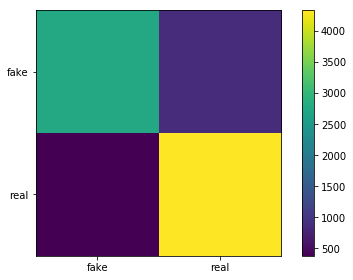

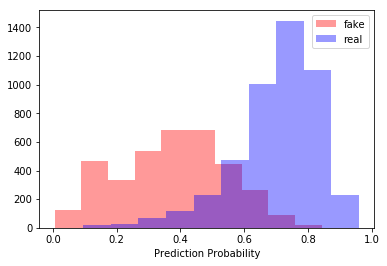

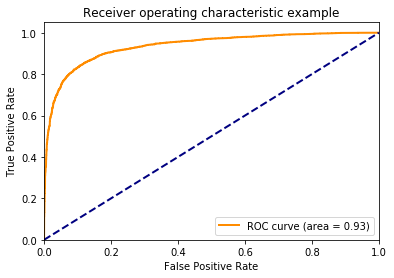

In [14]:
print(classification_report(y_test_bow, y_pred_bow))
print(confusion_matrix(y_test_bow, y_pred_bow,
                       labels=[0,1]))
plt.imshow(confusion_matrix(y_test_bow, y_pred_bow,
                            labels=[0,1]))
plt.tight_layout()
plt.colorbar()
plt.xticks(range(2), ["fake", "real"])
plt.yticks(range(2), ["fake", "real"])
plt.show()
#plt.savefig("../build/plots/RF/RF_bow_cnfs.pdf")
plt.close()

plt.hist(y_pred_prob_bow[y_test_bow == 0],label="fake", alpha = 0.4, color = "r")
plt.hist(y_pred_prob_bow[y_test_bow == 1],label = "real",alpha = 0.4, color = "b")
plt.xlabel("Prediction Probability")
plt.legend()
plt.show()
#plt.savefig("../build/plots/RF/RF_bow_prob.pdf")
plt.close()

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test_bow, y_pred_prob_bow)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#plt.savefig("../build/plots/RF/RF_bow_roc.pdf")
plt.close()